<a href="https://colab.research.google.com/github/sathvik044/LDA/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading and Preprocessing Data
Training data shape: (124, 13)
Test data shape: (54, 13)

Step 2: Model Training

Step 3: Model Evaluation

Results for LDA:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Results for Logistic Regression:
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815
F1 Score: 0.9816

Confusion Matrix:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Step 4: Visualizing Decision Boundaries


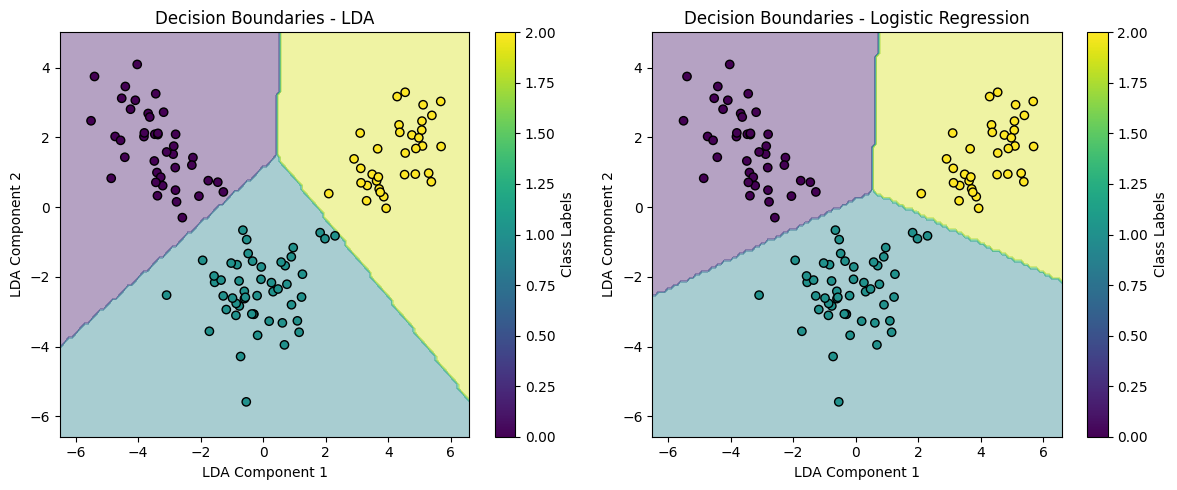


Step 5: Model Comparison Summary
Performance Comparison:
   LDA Accuracy: 1.0000
   Logistic Regression Accuracy: 0.9815

Assumptions and Model Complexity:
   - LDA assumes normally distributed data with equal covariance across classes.
   - Logistic Regression does not assume normality and is more flexible with data distributions.

Model Insights:
   - LDA highlights key features for class separation based on discriminant components.
   - Logistic Regression provides insights through its feature coefficients, indicating feature influence on predictions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

def lda_logistic_classification():
    # Step 1: Load Data and Preprocess
    print("Step 1: Loading and Preprocessing Data")
    wine_data = load_wine()
    X, y = wine_data.data, wine_data.target

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Standardizing the features for improved model performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Training data shape:", X_train_scaled.shape)
    print("Test data shape:", X_test_scaled.shape)

    # Step 2: Train Models
    print("\nStep 2: Model Training")
    # Initialize and train LDA model
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train_scaled, y_train)

    # Initialize and train Logistic Regression model
    logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    logistic_model.fit(X_train_scaled, y_train)

    # Step 3: Evaluate Models
    def evaluate_and_display(model, X, y_true, model_name):
        y_pred = model.predict(X)
        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1_score, _ = precision_recall_fscore_support(
            y_true, y_pred, average='weighted'
        )
        conf_matrix = confusion_matrix(y_true, y_pred)

        print(f"\nResults for {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1_score:.4f}")
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))

        return accuracy, precision, recall, f1_score

    print("\nStep 3: Model Evaluation")
    # Evaluate both LDA and Logistic Regression models
    lda_results = evaluate_and_display(lda_model, X_test_scaled, y_test, "LDA")
    logistic_results = evaluate_and_display(logistic_model, X_test_scaled, y_test, "Logistic Regression")

    # Step 4: Visualize Decision Boundaries (in 2D using LDA)
    def plot_boundaries(X, y, trained_models, model_labels):
        lda_for_viz = LinearDiscriminantAnalysis(n_components=2)
        X_2d = lda_for_viz.fit_transform(X, y)

        # Create mesh grid for plotting boundaries
        x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
        y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                            np.arange(y_min, y_max, 0.1))

        plt.figure(figsize=(12, 5))

        for idx, (model, label) in enumerate(zip(trained_models, model_labels)):
            plt.subplot(1, 2, idx + 1)

            # Fit a new model on the 2D LDA-transformed data
            model_2d = model.__class__()  # Create an instance of the model class
            model_2d.fit(X_2d, y)

            # Predict on mesh grid
            Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.4)

            # Scatter plot of the training points
            scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
            plt.colorbar(scatter, label='Class Labels')

            plt.title(f'Decision Boundaries - {label}')
            plt.xlabel('LDA Component 1')
            plt.ylabel('LDA Component 2')

        plt.tight_layout()
        plt.show()

    print("\nStep 4: Visualizing Decision Boundaries")
    plot_boundaries(X_train_scaled, y_train, [lda_model, logistic_model], ["LDA", "Logistic Regression"])

    # Step 5: Summary and Comparative Analysis
    print("\nStep 5: Model Comparison Summary")
    print("Performance Comparison:")
    print(f"   LDA Accuracy: {lda_results[0]:.4f}")
    print(f"   Logistic Regression Accuracy: {logistic_results[0]:.4f}")
    print("\nAssumptions and Model Complexity:")
    print("   - LDA assumes normally distributed data with equal covariance across classes.")
    print("   - Logistic Regression does not assume normality and is more flexible with data distributions.")
    print("\nModel Insights:")
    print("   - LDA highlights key features for class separation based on discriminant components.")
    print("   - Logistic Regression provides insights through its feature coefficients, indicating feature influence on predictions.")

if __name__ == "__main__":
    lda_logistic_classification()

